# Voting

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import myutils as my
from sklearn.tree import DecisionTreeClassifier

In [31]:
from sklearn import datasets

iris = datasets.load_iris()
type(iris)

sklearn.utils._bunch.Bunch

In [32]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [33]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [34]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [35]:
iris['DESCR']

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

#### DataFrame 생성

In [36]:
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [37]:
df['target'] = iris['target']
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### 결측치 확인

In [38]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

#### 중복치 확인

In [39]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

#### 학습set 분리

In [53]:
# X는 target값만 분리
X = df.drop(['target'], axis=1)
y = df['target']

In [54]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [55]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [56]:
from sklearn.model_selection import train_test_split

# stratify에 target값을 넣으면 y값이 test_size에 알맞게 나누어준다.
# 설정안하면 target값 비율이 기울어질수있음 (9:1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2022)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(120, 4) (30, 4)
(120,) (30,)


#### 정규화
##### Tree base model을 사용할땐 정규화를 안해도 된다!
##### Voting은 정규화 해야함
##### train데이터만 정규화

In [57]:
from sklearn.preprocessing import StandardScaler

# 학습시키기
scaler = StandardScaler()
scaler.fit(X_train)

# 학습된 스케일러에 실제로 넣어서 스케일링
X_train = scaler.transform(X_train)

# 위 2가지 작업을 동시에 실행
# X_train = scaler.fit_transform(X_train)
X_train[:5]

array([[ 0.74198233, -0.32371562,  0.33532535,  0.13579779],
       [ 0.24176952, -1.91389762,  0.73771577,  0.39652954],
       [-0.00833688, -0.77805333,  0.10538797,  0.00543191],
       [ 1.11714194, -0.09654676,  0.85268446,  1.43945654],
       [-0.50854969,  1.94797295, -1.15926764, -1.03749509]])

In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
# tree
from sklearn.tree import DecisionTreeClassifier
# Voting
from sklearn.ensemble import VotingClassifier

clf1 = KNeighborsClassifier()
clf2 = SVC()
clf3 = DecisionTreeClassifier()

clf = VotingClassifier(estimators = [('knn', clf1), ('svc', clf2), ('tree', clf3)],
                        voting='hard',
                        weights=[1, 1, 1]
                       )

In [59]:
# Voting 모델 학습시키기
clf.fit(X_train, y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier()), ('svc', SVC()),
                             ('tree', DecisionTreeClassifier())],
                 weights=[1, 1, 1])

In [60]:
clf.score(X_train, y_train)

0.9916666666666667

### test

#### 먼저 X_test 데이터도 스케일링

In [61]:
# !! scaler에 test데이터를 스케일링만 하고, 학습시키면 안됨!

In [62]:
X_test = scaler.transform(X_test)
y_test = y_test.values

In [63]:
y_pred = clf.predict(X_test)
y_pred[:5]

array([2, 0, 2, 1, 0])

In [64]:
my.precision_score(y_test, y_pred, average='macro')

0.9444444444444445

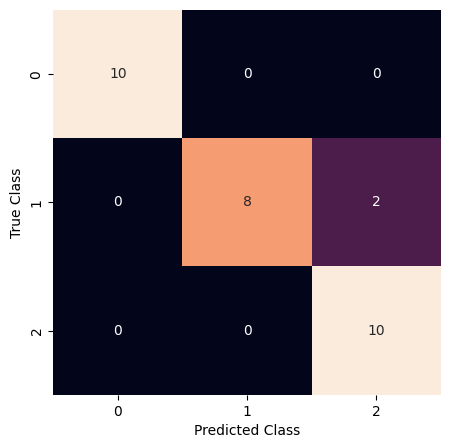

In [65]:
my.plot_confusion_matrix(y_test, y_pred)